# Programming

### 1. Write a function to calculate all possible assignment vectors of 2n users, where n users are assigned to group 0 (control), and n users are assigned to group 1 (treatment). 

In [1]:
# build-in function
from itertools import combinations
def allassign(n):
    return list(combinations(range(2*n), n))

In [2]:
# example, let n = 3
allassign(3)

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

In [12]:
# recursive approach
  # k: number of choosed elements 
  # n: candidate list length
def allSamples(k,n):
    allC = []
    if k == 1:
        for i in range(n):
            assignment = [0]*n
            assignment[i] = 1
            allC.append(assignment)
    elif n == k:
        assigment = [1]*n
        allC = [assigment]
    else:
        pl = n - k + 1
        for i in range(pl):
            assignment = [0]*(i+1)
            assignment[i] = 1
            for c in allSamples(k-1,n-i-1):
                allC.append(assignment+c)
    return allC

In [13]:
# example k = 3 and n = 2*k
k = 3
n = 2*k
print (allSamples(k,n))

[[1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [1, 1, 0, 0, 1, 0], [1, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 1], [0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1], [0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 1], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 1, 1]]


### 3. Program an algorithm to find the best approximate solution to the knapsack problem in a given time.

In [16]:
# using function knapsack
import knapsack
import numpy as np
weight = np.random.randint(10, size = 10)
value = np.random.randint(10, size = 10)
capacity = 5
knapsack.knapsack(weight, value).solve(capacity)

(14, [1, 4, 5])

In [17]:
# another example
from collections import namedtuple

Item = namedtuple('Item', 'name weight value'.split())

ITEMS = [
    Item("map", 9, 150),
    Item("compass", 13, 35),
    Item("water", 153, 200),
    Item("sandwich", 50, 160),
    Item("glucose", 15, 60),
    Item("tin", 68, 45),
    Item("banana", 27, 60),
    Item("apple", 39, 40),
    Item("cheese", 23, 30),
    Item("beer", 52, 10),
    Item("suntan cream", 11, 70),
    Item("camera", 32, 30),
    Item("t-shirt", 24, 15),
    Item("trousers", 48, 10),
    Item("umbrella", 73, 40),
    Item("waterproof trousers", 42, 70),
    Item("waterproof overclothes", 43, 75),
    Item("note-case", 22, 80),
    Item("sunglasses", 7, 20),
    Item("towel", 18, 12),
    Item("socks", 4, 50),
    Item("book", 30, 10),
    ]

def efficiency(item):
    return float(item.value) / float(item.weight)

def packing(items=ITEMS, max_weight=400):
    def pack(item):
        # Attempt to pack item; return True if successful.
        if item.weight <= pack.max_weight:
            pack.max_weight -= item.weight
            return True
        else:
            return False

    pack.max_weight = max_weight
    return list(filter(pack, sorted(items, key=efficiency, reverse=True)))

In [18]:
print(packing(items=ITEMS, max_weight=400))

[Item(name='map', weight=9, value=150), Item(name='socks', weight=4, value=50), Item(name='suntan cream', weight=11, value=70), Item(name='glucose', weight=15, value=60), Item(name='note-case', weight=22, value=80), Item(name='sandwich', weight=50, value=160), Item(name='sunglasses', weight=7, value=20), Item(name='compass', weight=13, value=35), Item(name='banana', weight=27, value=60), Item(name='waterproof overclothes', weight=43, value=75), Item(name='waterproof trousers', weight=42, value=70), Item(name='water', weight=153, value=200)]


### 4. Program an algorithm to find the best approximate solution to the travelling salesman problem in a given time.

In [19]:
# 2-opt algorithm
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold):
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route 

In [20]:
# Create a matrix of cities, with each row being a location in 2-space (function works in n-dimensions).
cities = np.random.RandomState(42).rand(70,2)
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(cities,0.001)

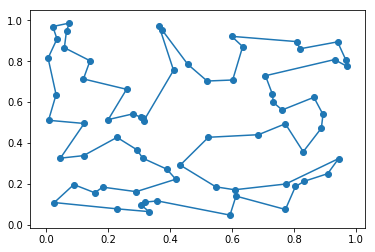

In [22]:
# approximated solution path shown on a plot
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
# Plot the cities
plt.scatter(cities[:,0],cities[:,1])
# Plot the path
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()

In [23]:
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))

Route: [ 0 12 68  4 57 27 60 63 26 17 25 56 37 43  1 46 40 59 44 31 47 19 48  9
 24 15 35 67 52  6 58 38 10 14 39 61 18 41 54 49 28  2  7 55 65 30 42 11
 62 66 29 20 64 50 36 21  5 34 16  3 33 45 22 13 32  8 23 51 53 69]

Distance: 7.465841014357375


### 5. You have a stream of data coming in of size n, but you don’t know what n is ahead of time. Write an algorithm that will take a random sample of k elements. Can you write one that takes O(k) space?

In [24]:
# reservior sampling
import random
def reservior_sampling(iterator, k):
    sample = []
    N = 0
    for item in iterator:
        N += 1
        if len(sample) < k:
            sample.append(item)
        else:
            s = int(random.random()*N)
            if s < k:
                sample[s] = item
    return sample

In [25]:
# another way of reservior sampling
# algorithm
import numpy as np
def reservoir_sampling(size):
    i, sample = 0, []
    while True:
        item = yield i, sample
        
        i += 1
        k = np.random.randint(0, i)
        if len(sample) < size:
            sample.append(item)
        elif k < size:
            sample[k] = item

In [26]:
# sampling
reservoir = reservoir_sampling(5)
next(reservoir)
for i in range(1000):
    k, sample = reservoir.send(i)
    if k % 100 == 0:
        print(k, sample)

100 [19, 30, 75, 21, 5]
200 [159, 30, 75, 21, 104]
300 [203, 232, 75, 242, 104]
400 [203, 232, 75, 242, 304]
500 [203, 470, 75, 402, 304]
600 [556, 470, 75, 402, 304]
700 [695, 470, 75, 402, 304]
800 [695, 722, 75, 402, 304]
900 [695, 722, 75, 402, 304]
1000 [695, 722, 75, 402, 900]


### 6. Write an algorithm that can calculate the square root of a number

In [28]:
# simple way but slow
def sqr_root(x):
    if x < 0:
        return "Error, x could not be negative."
    elif x == 0:
        return x
    else:
        a = 1
        b = x
        while (abs(a-b) > 0):
            a = (a+b)/2
            b = x/a
        return a

In [33]:
print(sqr_root(700))

26.457513110645905


In [35]:
# babyloian method (fast way)
def sqr_root(x):
    if x < 0:
        return "Error, x could not be negative."
    elif x == 0:
        return 0
    else:
        a = x/2.0
        b = a + 1
        while (a != b):
            b = a
            a = (a + x/a)/2
        return a

In [37]:
print(sqr_root(7000))

83.66600265340756
